In [8]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rohan\Downloads\ML proj\Untitled Folder\output.csv")
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [10]:


df['anaemic'] = df['Anaemic'].apply(lambda x: 1 if x == 'Yes' else 0)
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes,1
1,2,F,45.6033,28.1900,26.2067,13.5,No,0
2,3,F,45.0107,28.9677,26.0215,11.7,No,0
3,4,F,44.5398,28.9899,26.4703,13.5,No,0
4,5,M,43.2870,30.6972,26.0158,12.4,No,0
...,...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes,1
100,101,M,42.2324,30.6757,27.0919,6.3,Yes,1
101,102,F,45.6064,31.9084,22.4852,12.7,No,0
102,103,M,45.2095,29.2769,25.5136,13.4,No,0


In [13]:
df.drop('Anaemic',axis='columns',inplace=True)

In [14]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0


In [15]:
df.drop('Sex',axis='columns',inplace=True)

In [41]:
df

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,2,45.6033,28.1900,26.2067,13.5,0
2,3,45.0107,28.9677,26.0215,11.7,0
3,4,44.5398,28.9899,26.4703,13.5,0
4,5,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,1
100,101,42.2324,30.6757,27.0919,6.3,1
101,102,45.6064,31.9084,22.4852,12.7,0
102,103,45.2095,29.2769,25.5136,13.4,0


In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\rohan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


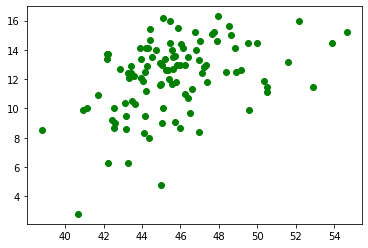

In [27]:
plt.scatter(df['%Red Pixel'],df['Hb'],color='green')


In [45]:
x = df.drop(['Number','anaemic'],axis = 'columns')
x

,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,43.2555,30.8421,25.9025,6.3
1,45.6033,28.1900,26.2067,13.5
2,45.0107,28.9677,26.0215,11.7
3,44.5398,28.9899,26.4703,13.5
4,43.2870,30.6972,26.0158,12.4
...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5
100,42.2324,30.6757,27.0919,6.3
101,45.6064,31.9084,22.4852,12.7
102,45.2095,29.2769,25.5136,13.4


In [46]:
y = df.anaemic

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:
model.score(x_test,y_test)

0.5077812131964388

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_params = {
    'svm' :{
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['linear','rbf']
        }
    },
    'log' : {
        'model' : LogisticRegression(solver='liblinear',multi_class  = 'auto'),
        'params' : {
            'C' : [1,25,50],
            
        }
    },
    'gau' :{
        'model' : GaussianNB(),
        'params' : {
            
        
        }
    },
    'mul' :{
        'model' : MultinomialNB(),
        'params' : {
            
        }
    },
    'rf' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [20]
        }
    },
    'dt' :{
        'model' : DecisionTreeClassifier(),
        'params' : {
            'max_leaf_nodes': [20]
        }
    }

    
}

In [54]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'Model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [55]:
df1 = pd.DataFrame(scores)
df1

,Model,best_score,best_params
0,svm,0.952206,"{'C': 1, 'kernel': 'linear'}"
1,log,0.975735,{'C': 25}
2,gau,0.951471,{}
3,mul,0.831618,{}
4,rf,0.963971,{'n_estimators': 20}
5,dt,0.950735,{'max_leaf_nodes': 20}


In [59]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [60]:
model2.score(x_test,y_test)

0.9523809523809523

In [61]:
model2.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [62]:
x_test

,%Red Pixel,%Green pixel,%Blue pixel,Hb
14,46.9942,26.0496,26.9562,14.6
74,44.7200,28.0357,27.2443,14.0
13,45.0484,31.1049,23.8467,9.0
68,42.5892,31.5405,25.8703,9.0
38,47.3642,27.4730,25.1628,11.8
53,47.1003,28.3195,24.5801,12.4
23,47.6372,26.7953,25.5675,15.1
17,44.0957,29.9973,25.9070,8.3
90,46.3745,28.8820,24.7435,10.7
0,43.2555,30.8421,25.9025,6.3


In [75]:
model2.predict([[47.45,31.75,23.26,11.0]])

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [77]:
r = float(input("Enter the Red Pixel value"))
g = float(input("Enter the Blue Pixel value"))
b = float(input("Enter the Green Pixel value"))
hb = float(input("Enter the haemoglobin value"))

model2.predict([[r,g,b,hb]])

Enter the Red Pixel value46.23
Enter the Blue Pixel value26.25
Enter the Green Pixel value23.26
Enter the haemoglobin value9.0


C:\Users\rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)